## For Iris Dataset

In [45]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt

# Warings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

In [57]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [59]:
x = iris_dataset.data
y = iris_dataset.target

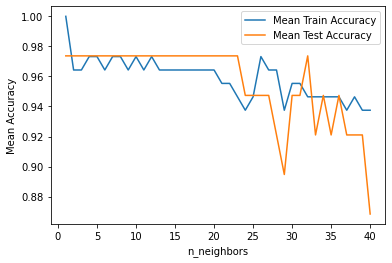

In [69]:

#Mean Plot of Train and Test Accuracy vs n_neighbors 


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

#list of neighbors from 1-40

neighbor_list = range(1, 41)

#creating a list for train and test mean accuracy ranging 1-40 neighbors

train_mean_list_accuracy = []
test_mean_list_accuracy= []


#Loop for the 50 trials per n_neighbors

for n_neighbors in neighbor_list:
    
    train_list_accuracy = []
    test_list_accuracy= []
    
    for i in range(50):

        kNN = KNeighborsClassifier(n_neighbors=n_neighbors)
        kNN.fit(x_train, y_train)

        train_list_accuracy.append(kNN.score(x_train, y_train))
        test_list_accuracy.append(kNN.score(x_test, y_test))
        
    train_mean_acccuracy = np.mean(train_list_accuracy)
    test_mean_acccuracy = np.mean(test_list_accuracy)
    
    train_mean_list_accuracy.append(train_mean_acccuracy)
    test_mean_list_accuracy.append(test_mean_acccuracy)

plt.plot(neighbor_list, train_mean_list_accuracy, label="Mean Train Accuracy")
plt.plot(neighbor_list, test_mean_list_accuracy, label="Mean Test Accuracy")
plt.ylabel("Mean Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [72]:
min_diff = None
for num1 in train_mean_list_accuracy:
    for num2 in test_mean_list_accuracy:
        diff = abs(num1 - num2)
        if min_diff is None or diff < min_diff:
            min_diff = diff

print("The lowest difference value is:", min_diff)

The lowest difference value is: 0.00046992481203000924


In [84]:
min_diff = None
min_range = None
for i in range(len(train_mean_list_accuracy)):
    diff = abs(train_mean_list_accuracy[i] - test_mean_list_accuracy[i])
    if min_diff is None or diff < min_diff:
        min_diff = diff
        min_range = i

print(f"The smallest difference value between the mean train accuracy and mean test accuracy is {min_diff} \nwhere n_neighbor = {min_range}.")


The smallest difference value between the mean train accuracy and mean test accuracy is 0.00046992481203000924 
where n_neighbor = 3.
